
## STEP 1 - Data Pre-Processing

Import Libraries

Read dataset

Add Cap and floor for Logisitc growth -> Cap must be less than floor not even equal to 

## Step 2 : Train test split 

## Step 3 : Basic Prophet Model and Trend Points 

Default prophet model

Plotting basic plot_components

Visualizing Change points

## Step 4 :  Specifying Change Points Manually

## Step 5 : Adding Logistic growth

Not so useful 


## Step 6 : Evaluating performance

In [1]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [2]:
dataset= pd.read_csv(r"C:\Users\Phanindra.Panthagani\OneDrive - Fractal Analytics Pvt. Ltd\1Verizon\H_and_M_stockdata.csv")
dataset.head()

# Add Cap to make it applicable to logisitic growth 
cap = dataset['High']
flr = dataset['Low']
dataset['cap'] = cap
dataset['floor'] = flr

dataset['cap'].fillna(10e-9)
dataset['floor'].fillna(0)
dataset.head()


Date        Open        High         Low       Close   Adj Close  \
0   5/6/2016  268.600006  268.600006  264.899994  265.399994  224.724960   
1   5/9/2016  267.500000  274.000000  267.000000  272.700012  230.906174   
2  5/10/2016  275.000000  275.000000  269.399994  270.100006  228.704651   
3  5/11/2016  271.799988  272.500000  265.000000  265.500000  224.809631   
4  5/12/2016  265.000000  266.799988  261.799988  262.399994  222.184738   

      Volume  Unnamed: 7  Day Diff         cap       floor  
0  3517836.0         NaN       NaN  268.600006  264.899994  
1  3509696.0         NaN       3.0  274.000000  267.000000  
2  2748770.0         NaN       1.0  275.000000  269.399994  
3  3113613.0         NaN       1.0  272.500000  265.000000  
4  3221777.0         NaN       1.0  266.799988  261.799988

In [3]:
dataset.tail()

Date        Open        High         Low       Close   Adj Close  \
1252  4/29/2021  208.149994  213.600006  208.149994  210.500000  210.500000   
1253  4/30/2021  210.100006  211.399994  208.149994  208.800003  208.800003   
1254   5/3/2021  209.250000  209.699997  205.850006  208.899994  208.899994   
1255   5/4/2021  209.050003  212.250000  207.000000  207.250000  207.250000   
1256   5/5/2021  207.850006  211.850006  207.800003  211.850006  211.850006   

         Volume  Unnamed: 7  Day Diff         cap       floor  
1252  3530687.0         NaN       1.0  213.600006  208.149994  
1253  1366934.0         NaN       1.0  211.399994  208.149994  
1254  1792513.0         NaN       3.0  209.699997  205.850006  
1255  3727795.0         NaN       1.0  212.250000  207.000000  
1256  1935719.0         NaN       1.0  211.850006  207.800003

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1257 non-null   object 
 1   Open        1256 non-null   float64
 2   High        1256 non-null   float64
 3   Low         1256 non-null   float64
 4   Close       1256 non-null   float64
 5   Adj Close   1256 non-null   float64
 6   Volume      1256 non-null   float64
 7   Unnamed: 7  0 non-null      float64
 8   Day Diff    1256 non-null   float64
 9   cap         1256 non-null   float64
 10  floor       1256 non-null   float64
dtypes: float64(10), object(1)
memory usage: 108.1+ KB


In [5]:
dataset.describe()

Open         High          Low        Close    Adj Close  \
count  1256.000000  1256.000000  1256.000000  1256.000000  1256.000000   
mean    184.268065   186.266855   182.201807   184.240024   169.326259   
std      43.120444    43.092385    43.048569    43.096887    33.251075   
min     106.139999   109.000000    98.129997   105.879997   105.879997   
25%     142.850006   145.250000   140.595005   142.987499   138.537502   
50%     179.279999   181.145004   176.650002   179.275002   174.509681   
75%     215.000000   217.749996   213.500000   215.150002   195.280437   
max     277.500000   279.899994   275.200012   277.399994   234.885834   

             Volume  Unnamed: 7     Day Diff          cap        floor  
count  1.256000e+03         0.0  1256.000000  1256.000000  1256.000000  
mean   4.636488e+06         NaN     1.453025   186.266855   182.201807  
std    3.255584e+06         NaN     0.893192    43.092385    43.048569  
min    0.000000e+00         NaN     1.000000   109.000000    98.129997  
25%    2.864396e+06         NaN     1.000000   145.250000   140.595005  
50%    3.848066e+06         NaN     1.000000   181.145004   176.650002  
75%    5.301212e+06         NaN     1.000000   217.749996   213.500000  
max    4.041379e+07         NaN     6.000000   279.899994   275.200012

In [6]:

dataset.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Unnamed: 7', 'Day Diff', 'cap', 'floor'],
      dtype='object')

## Step 2 : Train test split 

In [7]:
X= dataset
y= dataset.iloc[:,4]
y # y is closing prices

0       265.399994
1       272.700012
2       270.100006
3       265.500000
4       262.399994
           ...    
1252    210.500000
1253    208.800003
1254    208.899994
1255    207.250000
1256    211.850006
Name: Close, Length: 1257, dtype: float64

In [8]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
# # X_train.head(2)

#Cannot use this since the split is random , we need to make sure its sequential. 


def split_train_test(X,y,train_size=0.75):
    """This function is used to split X,y into train test dataframes
    similar to scikit learn's train test split but only for time series to maintain
    the follow up of test after train.
    
    Args:
        X (pandas dataframe): X data to be split
        y (pandas dataframe): y data to be split
        train_size (float, optional): Train fraction between 0 and 1. Defaults to 0.75.
    
    
    Returns:
        X_train, X_test, y_train, y_test: The 4 pandas dataframes 
    
    """    
    
    assert ((0 <train_size<=1.0) ,"Please give train size between 0 and 1")
    train_length =  int(train_size*len(y))
    print("Length of the train dataset is",train_length)
    X_train = X.iloc[:train_length]
    y_train = y.iloc[:train_length]
    
    X_test = X.iloc[train_length:]
    y_test = y.iloc[train_length:]
    
    print("Length of y_test is",len(y_test))
    
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = split_train_test(X,y,train_size=0.75)   
y_test.fillna(0,inplace= True)

Length of the train dataset is 942
Length of y_test is 315


<>:24: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:24: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<ipython-input-8-3ee8378c24f9>:24: SyntaxWarning:

assertion is always true, perhaps remove parentheses?



In [9]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X_train["Date"])
train_dataset['y']=y_train
train_dataset['cap'] = X_train['cap']
train_dataset['floor'] = X_train['floor']

train_dataset.tail(2)

ds           y         cap       floor
940 2020-01-31  211.649994  214.350006  207.350006
941 2020-02-03  208.350006  212.649994  206.600006

In [10]:
train_dataset.describe()


y         cap       floor
count  942.000000  942.000000  942.000000
mean   190.964682  192.822951  189.065032
std     45.002074   45.155229   44.825457
min    120.940002  123.000000  117.099998
25%    147.395001  149.409996  145.134994
50%    189.159996  190.880005  187.510002
75%    224.700001  227.474998  222.474998
max    277.399994  279.899994  275.200012

## Step 3 : Basic Prophet Model and Trend Points 

In [11]:
prophet_basic = Prophet() 
prophet_basic.fit(train_dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
cap

0       268.600006
1       274.000000
2       275.000000
3       272.500000
4       266.799988
           ...    
1252    213.600006
1253    211.399994
1254    209.699997
1255    212.250000
1256    211.850006
Name: High, Length: 1257, dtype: float64

In [13]:
future= prophet_basic.make_future_dataframe(periods=300)



future.tail()

ds
1237 2020-11-25
1238 2020-11-26
1239 2020-11-27
1240 2020-11-28
1241 2020-11-29

In [14]:
forecast=prophet_basic.predict(future)


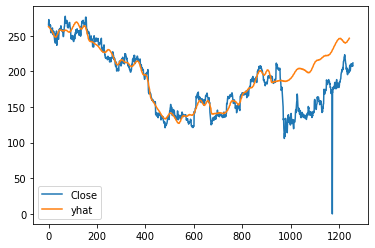

In [15]:

dataset['yhat'] = forecast['yhat']
dataset['Close'].plot(legend=True)
dataset['yhat'].plot(legend= True)

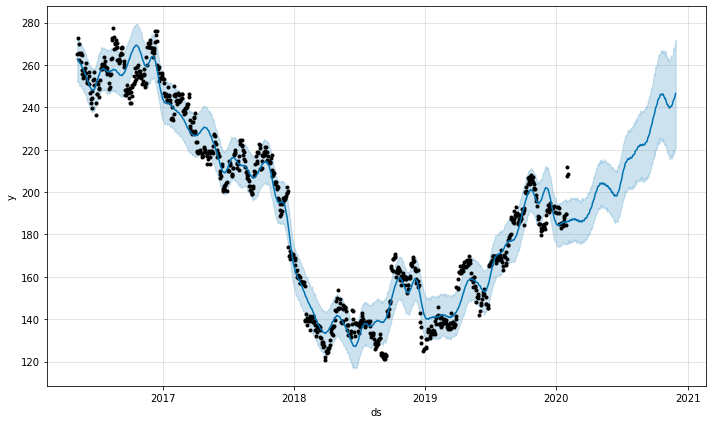

In [16]:
fig1 =prophet_basic.plot(forecast)

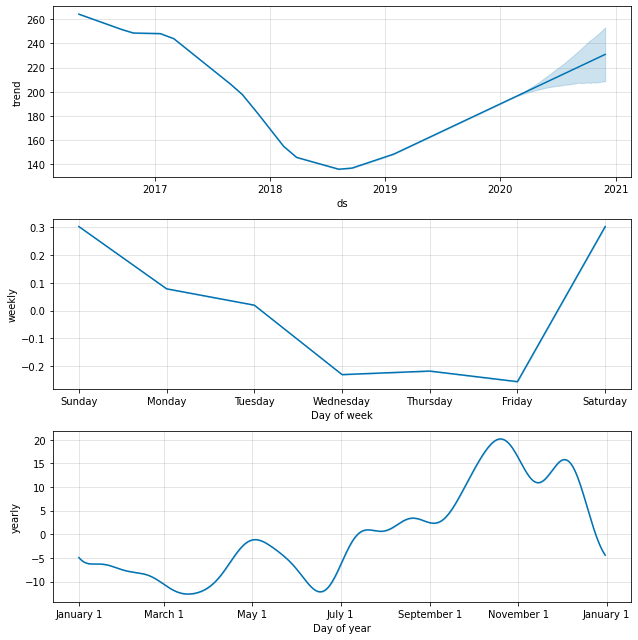

In [17]:
# to view  the forecast components
fig1 = prophet_basic.plot_components(forecast)

By default, Prophet adds 25 changepoints into the initial 80% of the data-set. The number of changepoints can be set by using the n_changepoints parameter when initializing prophet (e.g., model=Prophet(n_changepoints=30)

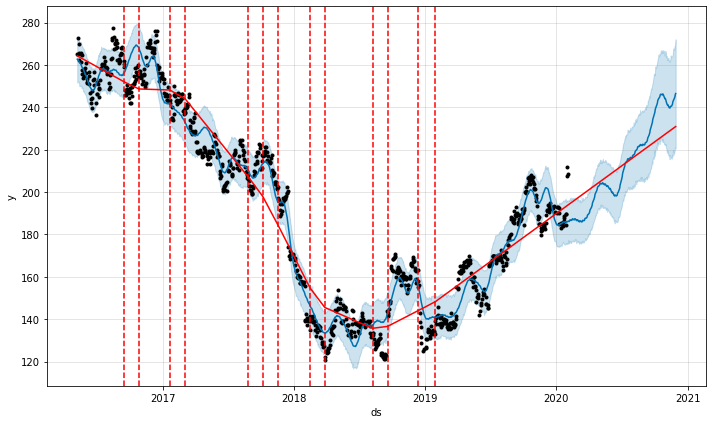

In [18]:
#Change points
#Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change
from prophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [19]:
prophet_basic.changepoints

30    2016-06-20
60    2016-08-02
90    2016-09-13
120   2016-10-25
150   2016-12-06
180   2017-01-19
211   2017-03-03
241   2017-04-18
271   2017-06-01
301   2017-07-13
331   2017-08-24
361   2017-10-05
391   2017-11-16
421   2018-01-02
451   2018-02-13
481   2018-03-27
511   2018-05-14
541   2018-06-25
572   2018-08-07
602   2018-09-18
632   2018-10-30
662   2018-12-11
692   2019-01-29
722   2019-03-12
752   2019-04-25
Name: ds, dtype: datetime64[ns]

### Prophet will also let us take a look at the magnitudes of these possible changepoints

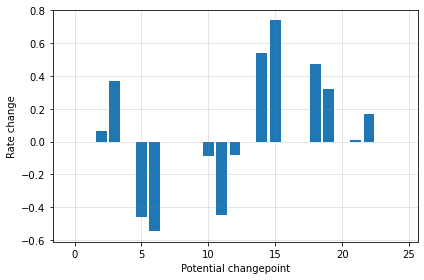

In [20]:
deltas = prophet_basic.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


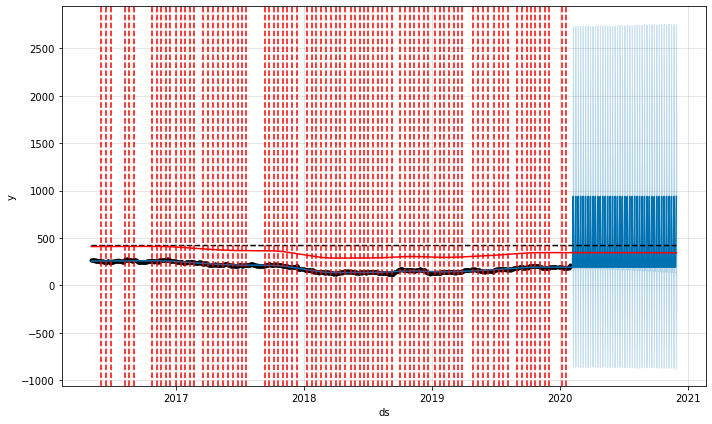

In [33]:
pro_change= Prophet(changepoint_range=0.99, n_changepoints=100,mcmc_samples=300,
                   yearly_seasonality = False, weekly_seasonality = True)
fitted_train = pro_change.fit(train_dataset)
forecast = fitted_train.predict(future)
fig= pro_change.plot(forecast)
b = add_changepoints_to_plot(fig.gca(), pro_change, forecast)


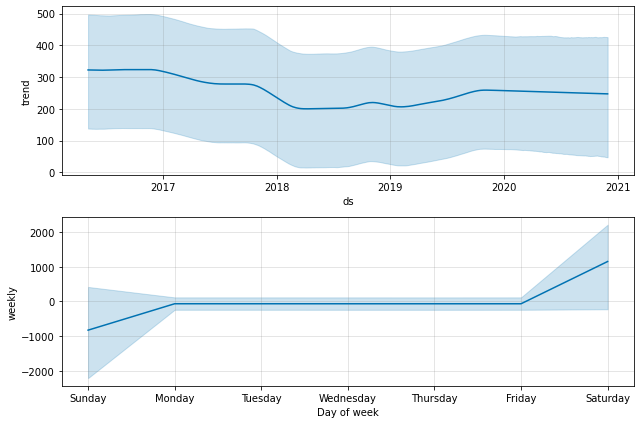

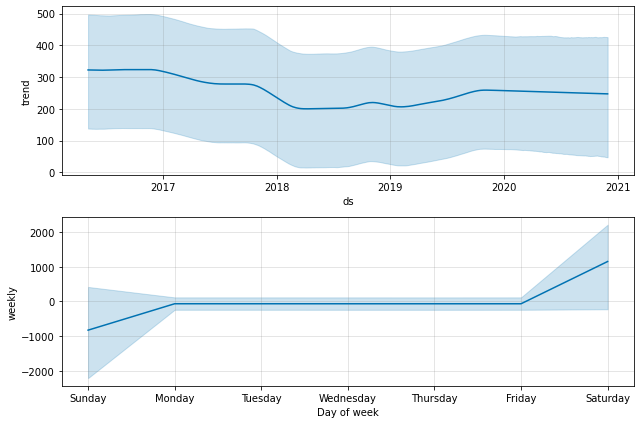

In [22]:
pro_change.plot_components(forecast)

## Step 4 :  Specifying Change Points Manually

In [23]:
train_dataset['ds'].describe()

<ipython-input-23-49bd4bfc127a>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                     942
unique                    942
top       2017-10-30 00:00:00
freq                        1
first     2016-05-06 00:00:00
last      2020-02-03 00:00:00
Name: ds, dtype: object

In [24]:
train_dataset.head()

ds           y         cap       floor
0 2016-05-06  265.399994  268.600006  264.899994
1 2016-05-09  272.700012  274.000000  267.000000
2 2016-05-10  270.100006  275.000000  269.399994
3 2016-05-11  265.500000  272.500000  265.000000
4 2016-05-12  262.399994  266.799988  261.799988

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


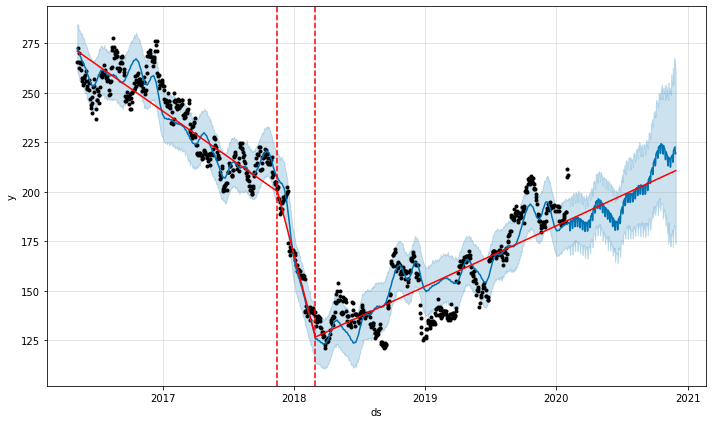

In [25]:
pro1 = Prophet(growth = 'linear',
               changepoints=['2017-11-15',
                             '2018-03-01'],
               changepoint_prior_scale = 0.6)

fitted_manual = pro1.fit(train_dataset)
forecast_manual = fitted_manual.predict(future)
fig=pro1.plot(forecast_manual)
a = add_changepoints_to_plot(fig.gca(), pro1, forecast_manual)

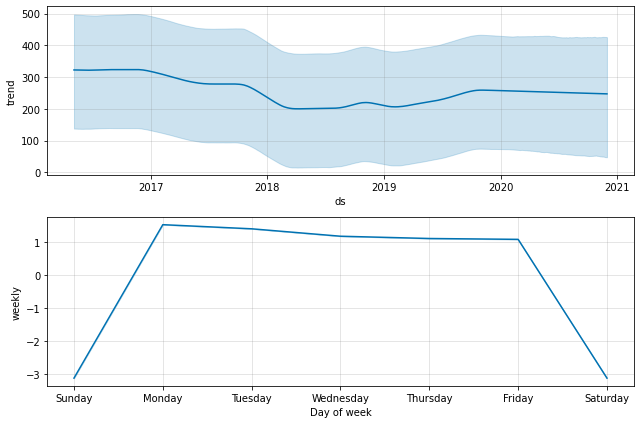

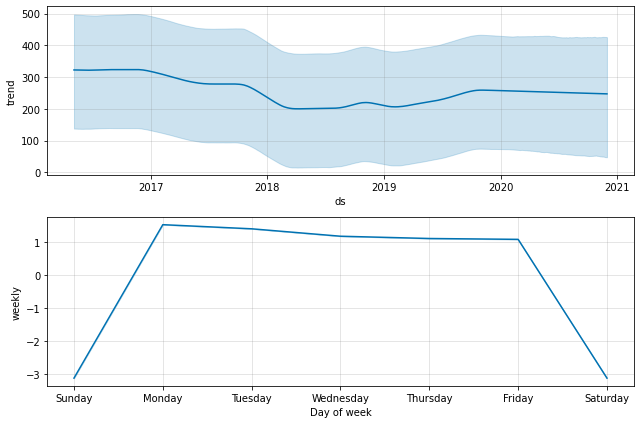

In [26]:
fitted_manual.plot_components(forecast)

## Step 5 : Adding Logistic growth

In [27]:
train_dataset['caplessthanfloor'] = train_dataset['cap'] <= train_dataset['floor'] 
train_dataset.head()
train_dataset['caplessthanfloor'].value_counts()

# Cap must be greater than floor not even equal to 

False    937
True       5
Name: caplessthanfloor, dtype: int64

In [28]:
# We need to add a small value so that cap is greater than floor 
#For logistic to fit 
cp_lessthan_Fl_mask = (train_dataset['caplessthanfloor'] == True)
train_dataset.loc[cp_lessthan_Fl_mask,'cap'] = train_dataset.loc[cp_lessthan_Fl_mask,'cap'] + 10e-9

#Recheck to see Cap is always greater than floor 
train_dataset['caplessthanfloor'] = train_dataset['cap'] <= train_dataset['floor'] 
train_dataset.head()
train_dataset['caplessthanfloor'].value_counts()


False    942
Name: caplessthanfloor, dtype: int64

The logistic growth model can also handle a saturating minimum, which is specified with a column floor in the same way as the cap column specifies the maximum

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


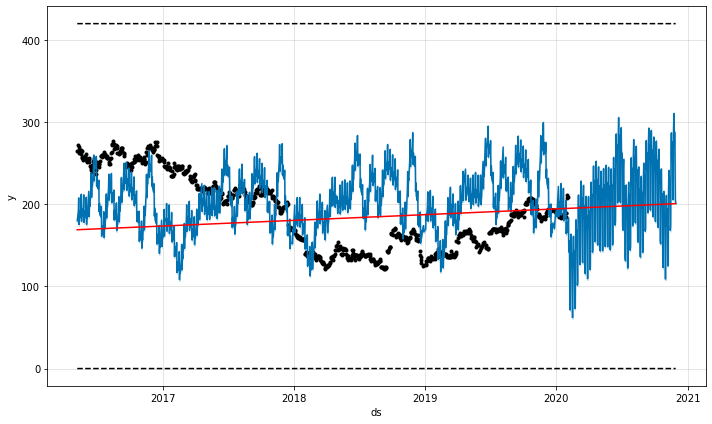

In [29]:
pro_logistic = Prophet(growth = 'logistic',  n_changepoints= 60, seasonality_mode='multiplicative',
                      changepoint_prior_scale=0.05)


future['cap'] = max(train_dataset['cap'])*1.5
future['floor'] = 0

fitted_forecast = pro_logistic.fit(train_dataset).predict(future)
fig1 = pro_logistic.plot(fitted_forecast)
c = add_changepoints_to_plot(fig1.gca(), pro_logistic, fitted_forecast)

## Step 6 : Evaluating performance

X_test, y_test were in train _test split . We will use these to evaluate performance

https://scikit-learn.org/stable/modules/model_evaluation.html

# Kaggle example notebooks


In [30]:
def EvaluatePerformance_fbprophet(model,test,y_true):
    """ Evaluating model performance of fb prophet
    
    
    Args:
        model (fbprophetmodel): fb prophet model fit on the training data
        test (pandas dataframe): X_test predicted dataframes
        y_true (pandas dataframe): True values dataframe
    
    
    Returns:
        return_dict: Dictionary containing the metrics and the predicted dataframe
    
    """    

    
    
    #Make sure you use the command below to install latest version of scikit learn
    # conda install -c conda-forge scikit-learn  
    
    from sklearn.metrics import mean_poisson_deviance,mean_squared_error
    test_dataset = pd.DataFrame()
    test_dataset['ds'] = pd.to_datetime(test["Date"])
    predicted_df = model.predict(test_dataset) #Get the predicted data frame on test
    y_pred = predicted_df['yhat'] #yhat is the output column name in fbprophet
    print("y_pred is \n",y_pred)
    
    
    RMSE = mean_squared_error(y_true, y_pred,squared= False)
    print("The RMSE of the model with the test data is",RMSE)
    
    Mean_poission_dev = mean_poisson_deviance(y_true, y_pred)
    print("The Mean_poission_dev of the model with the test data is",Mean_poission_dev)
    
    return_dict = { "Root mean squared error" : RMSE,
                    "prediction_dataframe" : y_pred,
                    "mean_poisson_deviance":Mean_poission_dev}
    
    
    return return_dict


In [31]:
EvaluatePerformance_fbprophet(fitted_manual,X_test,y_test)

y_pred is 
 0      184.280230
1      184.173838
2      184.232254
3      184.342587
4      185.241284
          ...    
310    226.530210
311    226.446684
312    226.464532
313    226.126932
314    225.662702
Name: yhat, Length: 315, dtype: float64
The RMSE of the model with the test data is 49.23114069510546
The Mean_poission_dev of the model with the test data is 13.871455083792222


{'Root mean squared error': 49.23114069510546,
 'prediction_dataframe': 0      184.280230
 1      184.173838
 2      184.232254
 3      184.342587
 4      185.241284
           ...    
 310    226.530210
 311    226.446684
 312    226.464532
 313    226.126932
 314    225.662702
 Name: yhat, Length: 315, dtype: float64,
 'mean_poisson_deviance': 13.871455083792222}

In [32]:
EvaluatePerformance_fbprophet(fitted_train,X_test,y_test)

y_pred is 
 0      190.964921
1      190.646840
2      190.604676
3      190.654512
4      190.929742
          ...    
310    177.036884
311    177.086720
312    177.361950
313    177.185132
314    176.867051
Name: yhat, Length: 315, dtype: float64
The RMSE of the model with the test data is 38.30660029008249
The Mean_poission_dev of the model with the test data is 9.155534006570353


{'Root mean squared error': 38.30660029008249,
 'prediction_dataframe': 0      190.964921
 1      190.646840
 2      190.604676
 3      190.654512
 4      190.929742
           ...    
 310    177.036884
 311    177.086720
 312    177.361950
 313    177.185132
 314    176.867051
 Name: yhat, Length: 315, dtype: float64,
 'mean_poisson_deviance': 9.155534006570353}